# Credit approvals


Author: Nick Van Bergen <br><br>
**To view fully rendered notebook click [here](https://nbviewer.org/github/nvbergen/DC_project_CC_apps/blob/0cca85c246ab882988ed215ff6a3b77b03b3d526/Code/Credit%20approval%20Project.ipynb)**

This project inspired by guided project from [datacamp](https://app.datacamp.com/learn/projects/558). <br>
The data souce is from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/credit+approval) <br> 





<a id = "top"></a>

---
## Contents
1. [Background and problem statement](#background)
1. [Library Imports](#imports)
1. [Data Ingestion](#ingest)
    * Data Description
    * Data set dictionary Column Names
1. [Data set Inspection](#inspect)
1. [Date Cleaning](#cleaning)
1. [EDA](#eda)
    * Location
    * Variability
    * Distribution
    * Correlation
1. Data Preprocessing
1. Logistic Regression Classifier
    1.  Fit
    1. score 
    1. grid search
1. [Conclusions and Recommendations](#conclusions)

<a id = "background"></a>

---
## Background and problem statement.
[[Back to contents]](#top) *-* [[Next Section: Library Imports]](#imports)<br> <br>
There was a time when credit card applications were conducted in-person or over the phone. Data was collected by a human and then entered into the issuer's system for approval. The goal of a credit card issuer is to well _issue credit_. The issuer will earn a profit on the interest against the money borrowed. There are several risks to the issuer. One of these risks is issuing credit to a risky borrower whom fails in their contractual obligation to repay the lender. <br><br>
Banks beleive that there are objective factors that can predict if a borrower is apt to fail in their obligation and thus influence an issuers decision to approve or decline a prospective borrower from a credit card. <br><br>
There are operational risks associated with collecting and inputing data as well as decisioning the application if left totally up to a human operator. Thankfully, we can utilize some statistical learning methods on past applications to speed up the approval process. It is believed that most, if not all, credit issuers today utilize some form of **machine learning** to mitigate their business and operational risks. <br><br>
**Problem Statement:** _Can machine learning provide us with an accurate solution to predict if a borrower will be approved fro credit cards or not?_ 

<a id = "imports"></a>

---
## Imports
[[Back to contents]](#top) *-* [[Next Section: Data Ingestion]](#ingest)<br> <br>

In [1]:
#analytical and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#model
from sklearn.linear_model import LogisticRegression


#model evaluations
from sklearn.metrics import confusion_matrix

<a id="ingest"></a>

---
## Data Ingestion
[[Back to contents]](#top) *-* [[Next Section: Data Inspection]](#inspect)<br> <br>

In [2]:
apps = pd.read_csv("../data/crx.data", header = None)

In [3]:
apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Data Descriptions

The data set has been **anonymized** to protect sensitive information under general view of public analysts. <br> 
> This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. <br>

### Column Names
The website does offer an appropriate description of the columns. However, per above, there is no way to build an intuition from the information at hand. 

>Attribute Information:<br>
A0: b, a. <br>
A1: continuous. <br>
A2: continuous. <br>
A3: u, y, l, t. <br>
A4: g, p, gg. <br>
A5: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. <br>
A6: v, h, bb, j, n, z, dd, ff, o. <br>
A7: continuous. <br>
A8: t, f. <br>
A9: t, f. <br>
A10: continuous. <br>
A11: t, f. <br>
A12: g, p, s. <br>
A13: continuous. <br>
A14: continuous. <br>
A15: +,- (class attribute)<br>

[Source](https://archive.ics.uci.edu/ml/datasets/credit+approval) <br>
<br>
There are many notebooks that explain _probable_ feature names. One such blog describes the features, in order, as:
>Probable Feature Names: <br> 
A0: `Gender` <br>
A1: `Age` <br>
A2: `Debt` <br>
A3: `Married` <br>
A4: `BankCustomer` <br>
A5: `EducationLevel` <br>
A6: `Ethnicity` <br>
A7: `YearsEmployed` <br>
A8: `PriorDefault` <br>
A9: `Employed` <br>
A10: `CreditScore` <br>
A11: `DriversLicense` <br>
A12: `Citizen` <br>
A13: `ZipCode` <br>
A14: `Income` <br>
A15: `ApprovalStatus.` <br> 

[Source](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)

### Data Dictionary and column headings

Using the above information we will develop a full data dictionary below and map to our dataframe:

| Index | Feature name*    | Type                  | Value Range                                                             |                     Notes                     |
|:-----:|------------------|-----------------------|-------------------------------------------------------------------------|:---------------------------------------------:|
| 0     | _Gender_         | Categorical           | `b`, `a`                                                                | Definitions unknown                           |
| 1     | _Age_            | Numeric, Continuous   |                                                                         | Decimalized, in years                         |
| 2     | _Debt_           | Numeric, Continuous   |                                                                         | Definitions unknown                           |
| 3     | _Married_        | Categorical           | `u`, `y`, `l`, `t`                                                      | Definitions unknown                           |
| 4     | _BankCustomer_   | Categorical           | `g`, `p`, `gg`                                                          | Definitions unknown                           |
| 5     | _EducationLevel_ | Categorical           | `c`, `d`, `cc`, `i`, `j`, `k`, `m`, `r`, `q`, `w`, `x`, `e`, `aa`, `ff` | Definitions unknown                           |
| 6     | _Ethnicity_      | Categorical           | `v`, `h`, `bb`, `j`, `n`, `z`, `dd`, `ff`, `o`                          | Definitions unknown                           |
| 7     | _YearsEmployed_  | Numeric, Continuous   |                                                                         | Decimalized, in years                         |
| 8     | _PriorDefault_   | Categorical           | `t`, `f`                                                                | True = `t` = 1 <br> False = `f` = 0            |
| 9     | _Employed_       | Categorical           | `t`, `f`                                                                | True =  `t` = 1 <br> False = `f` = 0            |
| 10    | _CreditScore_    | Numeric, Continuous   |                                                                         |                                               |
| 11    | _DriversLicense_ | Categorical           | `t`,`f`                                                                 | True =  `t` = 1 <br> False = `f` = 0            |
| 12    | _Citizen_        | Categorical           | `g`, `p`, `s`                                                           | Unknown Definition                            |
| 13    | _ZipCode_        | Numeric, **discrete** |                                                                         | This should be **Categorical** and non-numeric                                              |
| 14    | _Income_         | Numeric, Continuous   |                                                                         |                                               |
| 15    | _ApprovalStatus_ | Categorical           | `+`,`-`                                                                 | `+` = Approved = 1 <br>  `-` = Not Approved = 0 |

In [4]:
#apply new column names to dataframe
apps.columns = ["Gender", "Age", "Debt", 
"Married", "BankCustomer", "EducationLevel", 
"Ethnicity", "YearsEmployed", "PriorDefault", 
"Employed", "CreditScore", "DriversLicense", 
"Citizen", "ZipCode", "Income", "ApprovalStatus"]
apps.head(3)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


<a id="inspect"></a>

---
## Data Inspection
[[Back to contents]](#top) *-* [[Next Section]](#next)<br> <br>
In this section, I would like to inspect the dataset.  This section has the goal of getting a general understanding of how the data is typed and these datatypes match our expectations against the data dictionary.  


In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Right away we see that there are some `Dtypes` that are `objects` that don't match our expectations. `Age` and `ZipCode` should be numeric. 
The `df.describe()` method is used here to evaluate all of our expected numeric features and provide basic descriptive statistics. I am looking at anything that is _highly_ unusual here. That is, I am looking to get a sense of where data is and how far apart datavalues are from one another. 

In [6]:
apps.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


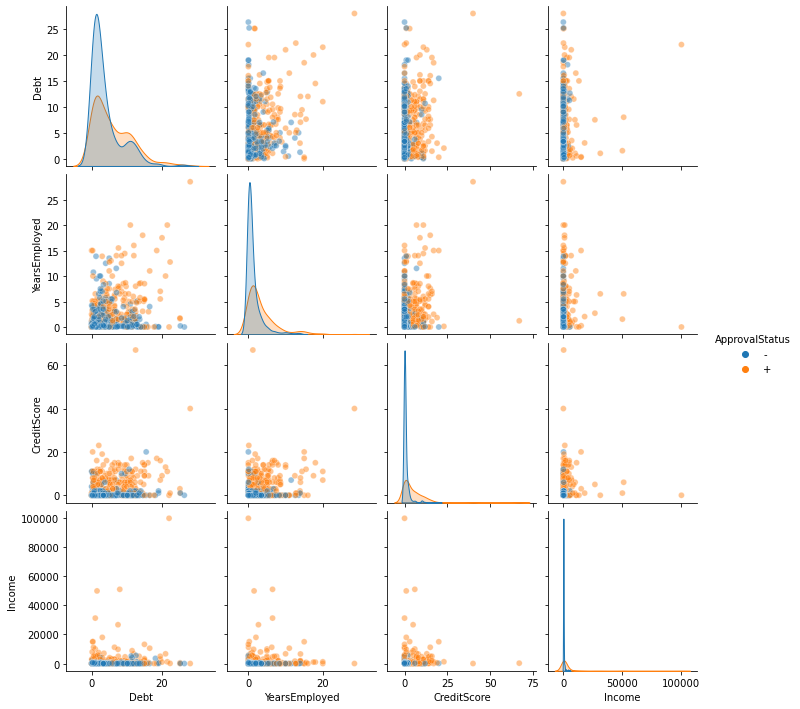

In [7]:
sns.pairplot(data = apps, hue = 'ApprovalStatus', hue_order = ['-', '+'], plot_kws={'alpha':.45});

I am supposed to have 6 numeric variables, and the `df.describe()` method only returned four. <br><br>
The `df.describe()` method is useful because, by default it will take the _numeric_ columns automatically. After applying this method, we see that only _Debt_, _YearsEmployed_, _CreditScore_, and _Income_ were returned. <br><br>
I am missing _Age_ and _ZipCode_, which were not returned due to the datatype being `object` as opposed to `int` or `float`.

In [8]:
#using .difference() we can exclude normally numeric columns and use .describe() on our categorical features. 
cats = apps[apps.columns.difference(list(apps.describe().columns))]
cats.describe()

,Age,ApprovalStatus,BankCustomer,Citizen,DriversLicense,EducationLevel,Employed,Ethnicity,Gender,Married,PriorDefault,ZipCode
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,350,2,4,3,2,15,2,10,3,4,2,171
top,?,-,g,g,f,c,f,v,b,u,t,00000
freq,12,383,519,625,374,137,395,399,468,519,361,132


The above process shows we got lucky with _Age_ column showing that there are 12 values that take the `?` form. <br><br>
Aslo, of note in the _ZipCode_ column is the value `00000` which indicates a missing value and the fact that this column has taken the datatype `object`. <br>Is this datatyping **incorrect** though? At least for _ZipCode_ it seems appropriate to not attempt to describe this data numerically since the number only represents a physical location and not a measurement. <br><br>
We will still need to find and deal with missing values in our dataset before we can explore the data in more detail. 

<a id="cleaning"></a>

---
## Data Cleaning
[[Back to contents]](#top) *-* [[Next Section: EDA]](#EDA)<br> <br>
We are hunting down missing values and addressing them by ascribing the `np.nan()` type to the datum that is missing.<br><br> 
We can do this rather easily, however, there are some other things that should be checked, or verified in this step. <br>
<br>
The goals of this section are to identify values that are truly missing and to ensure that datatypes make sense given our codebook. 


### First column investigation: _Gender_
The data dictionary shows that there should only be two values `b` or `a` in our first column _Gender_.

In [9]:
apps['Gender'].describe()

count     690
unique      3
top         b
freq      468
Name: Gender, dtype: object

Seeing that we have 3 values instead of 2: lets see what they are.

In [10]:
apps['Gender'].unique()

array(['b', 'a', '?'], dtype=object)

I will replace obvious missing values with numpy's `NaN` data type in the _Gender_ column.

In [11]:
apps['Gender'] = apps['Gender'].replace('?', np.nan)

In [12]:
apps['Gender'].isna().sum()

12

Going forward, in each column, replacing `?` with `np.nan` using the same method above afterwhich we can see the total number of missing values and their proportion to the overall dataset.

In [13]:
apps = apps.replace('?', np.nan)

In [14]:
print(apps.isna().sum())
print('total number NaN values is ', apps.isna().sum().sum())
print("Proportion of NaN to data set is ", apps.isna().sum().sum() / len(apps['Debt']))

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64
total number NaN values is  67
Proportion of NaN to data set is  0.09710144927536232


Now, in dealing with these missing values. <br><br> 
An option is to drop the rows containing `NaN` values, however this can be problematic because we are removing otherwise potentially useful data. <br><br>
Another option is interpolate the data. The general approach is to separate numerical and non-numerical data with numerical data taking some representative value (for example, Mean, Median, or Mode are good candidates) as a _"best guess"_ for the missing value. <br><br>
Non-Numeric value interpolation can be trickier and dependent on the dataset on which value to _fill_ with. Should it be the most frequent observation, or some other designation.

#### Interpolation: _Gender_
_Gender_ is a categorical variable taking only one of two values. Let's look at the balance of values again using `pd.value_counts()` to determine the columns balance.

In [15]:
apps['Gender'].value_counts()

b    468
a    210
Name: Gender, dtype: int64

We know that the number of missing values is 12. Adding 12 to the total values with the `b` (most frequent). Whatever `b` means in reality is not known to us, so let's just add the new `b` values using the `pd.fillna()` method on the _Gender_ series.

In [16]:
apps['Gender'] = apps['Gender'].fillna(apps['Gender'].value_counts().index[0])
print(apps['Gender'].value_counts())
print("Total Null values: ", apps['Gender'].isnull().sum())

b    480
a    210
Name: Gender, dtype: int64
Total Null values:  0


### Remaining columns
I will go through each column to attempt to understand the ranges of data and see if we can identify any other obvious candidates to be `missing` values. 

#### Column: _Age_
This is supposed to be a numeric column that is continuous. However, the pandas library has read it as an `object` datatype because of the insertion of of the string `'?'`. Now, we have already done the task of replacing the string with `NaN`, however the column is still as a `dtype = object` I will first cast this series to a float, then I will interpolate the missing values. 

In [17]:
apps['Age'].describe()

count       678
unique      349
top       22.67
freq          9
Name: Age, dtype: object

The `apps['Age'].describe()` method indicates this is an object column when it should be numeric. I will cast these values as float64's. 

In [18]:
apps['Age'] = apps['Age'].astype(float)
apps['Age'].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: Age, dtype: float64

Curiously, the minimum age in the dataset is rather young at 13.75 years, assuming, of course, that our assumed label is age in years. Further investigation should be done in the EDA section. 

##### Interpolation: _Age_
Since there is a wide dispersion between the mean which is sensitive to large values and median, I will use the median value to interpolate for the missing values in age. 

In [19]:
apps['Age'] = apps['Age'].fillna(apps['Age'].median())
print(apps['Age'].value_counts())
print("Total Null values: ", apps['Age'].isnull().sum())


28.46    12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64
Total Null values:  0


#### Columns: _Debt_
This should also be a continuous numeric variable. Let's check it. There are no missing values in this column so interpolation is not needed. 

In [20]:
apps['Debt'].describe()

count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: Debt, dtype: float64

This tells us that we have no empty values and it is a continuous variable. What we do not know, however, are the units of these values. Does the _median_ value of `2.75` mean 27,500 dollars, 2.75 dollars, 2.75 million? We just don't know so we will ignore explanatory information for now. <br><br>
This column appears ok as it is right now in terms of reasonableness. 

#### Column: _Married_
This column can take on the following values `u`, `y`, `l`, `t` of which we do not have further definition. I will check them for reasonableness by looking at the unique values in the series.  

In [21]:
apps['Married'].unique()

array(['u', 'y', nan, 'l'], dtype=object)

We have some empty values in the dataset, and values reported within are within our available value set `u`, `y` and `l` are all available values in this column. 

In [22]:
print(apps['Married'].value_counts())
print("Total null values = ", apps['Married'].isnull().sum())

u    519
y    163
l      2
Name: Married, dtype: int64
Total null values =  6


##### Interpolation: _Married_
We have six empty values. Again where will simply just add the most frequent as the missing value. 

In [23]:
apps['Married'] = apps['Married'].fillna(apps['Married'].value_counts().index[0])
print(apps['Married'].value_counts())
print("Total null values = ", apps['Married'].isnull().sum())

u    525
y    163
l      2
Name: Married, dtype: int64
Total null values =  0


#### Column: _Bank Customer_
This is a categorical column that can take on the values of `g`, `p`, and `gg`. As before, we do not know the definitions of these values as they have been previously anonymized. 

In [24]:
print(apps['BankCustomer'].unique())
print(apps['BankCustomer'].value_counts())
print("Total null values = ", apps['BankCustomer'].isnull().sum())

['g' 'p' nan 'gg']
g     519
p     163
gg      2
Name: BankCustomer, dtype: int64
Total null values =  6


##### Interpolation: _Married_
The 6 missing values will be imputed with the most frequent value, `g`.

In [25]:
apps['BankCustomer'] = apps['BankCustomer'].fillna(apps['BankCustomer'].value_counts().index[0])
print(apps['BankCustomer'].value_counts())
print("Total null values = ", apps['BankCustomer'].isnull().sum())

g     525
p     163
gg      2
Name: BankCustomer, dtype: int64
Total null values =  0


#### Column: _Education Level_
Values in this categorical variable's column can take the values `c`, `d`, `cc`, `i`, `j`, `k`, `m`, `r`, `q`, `w`, `x`, `e`, `aa`, and `ff`. We do not know the definitions of these values either. We are simply going to check for reasonableness against what we know already. 

In [26]:
print(apps['EducationLevel'].unique())
print(apps['EducationLevel'].value_counts())
print("Total null values = ", apps['EducationLevel'].isnull().sum())

['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64
Total null values =  9


Eyeballing these values may be a bit difficult to do. An easy way is to measure the `len()` of resulting array and see if that matches what we expect.

In [27]:
len(apps['EducationLevel'].unique())

15

I expected 14 categories, which the data had + a `NaN` type. 

##### Interpolation: _Education Level_
There are 9 missing values which will be taken on the most frequent again. 

In [28]:
apps['EducationLevel'] = apps['EducationLevel'].fillna(apps['EducationLevel'].value_counts().index[0])
print(apps['EducationLevel'].value_counts())
print("Total null values = ", apps['EducationLevel'].isnull().sum())

c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64
Total null values =  0


#### Column: _Ethnicity_
This column can take the values `v`, `h`, `bb`, `j`, `n`, `z`, `dd`, `ff`, `o` of which we have no operating definitions. Again we are only checking for reasonableness and to clean the data if needed. 

In [29]:
print(apps['Ethnicity'].unique())
print(apps['Ethnicity'].value_counts())
print(len(apps['Ethnicity'].unique()))
print("Total null values = ", apps['Ethnicity'].isnull().sum())

['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
10
Total null values =  9


We expected 9 and were returned 10 on account of the `NaN` value. 

##### Interpolation: _Ethnicity_
We will interpolate the missing values with the most frequent in this feature.

In [30]:
apps['Ethnicity'] = apps['Ethnicity'].fillna(apps['Ethnicity'].value_counts().index[0])
print(apps['Ethnicity'].value_counts())
print("Total null values = ", apps['Ethnicity'].isnull().sum())

v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
Total null values =  0


#### Column: _Years Employed_
We can guess at this given our column label (also a guess). Should be a continuous numeric variable. We can see that there are no empty `NaN` values and we have a complete series. Assuming the label is correct, what is interesting is where our 75th percentile is; `2.625` years. Borrowers in this dataset were mostly newer employees at their given firms. We do not know the nature of these employers or if all of our datapoints were from some group that would only average less than 5 years at a company before applying for credit. 

In [31]:
apps['YearsEmployed'].describe()

count    690.000000
mean       2.223406
std        3.346513
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: YearsEmployed, dtype: float64

There are no missing values in this feature. 

#### Column: _Prior Default_
This coulumn shoud be `t` for _True_ (or 1) or `f` for _False_ (or 0)

In [32]:
print(apps['PriorDefault'].describe())
print(apps['PriorDefault'].value_counts())
print("Total null values = ", apps['PriorDefault'].isnull().sum())

count     690
unique      2
top         t
freq      361
Name: PriorDefault, dtype: object
t    361
f    329
Name: PriorDefault, dtype: int64
Total null values =  0


In [33]:
apps['PriorDefault'].value_counts(normalize = True)

t    0.523188
f    0.476812
Name: PriorDefault, dtype: float64

This would seem to have a heavy influence on credit card approvals. Again, our guess is that this column is representing prior defaults. No data cleaning was done in this step. 
<br><br>
There is an added benefit here of seeing that our data, in this category, is nearly balanced and that there are no missing values to interpolate.

#### Column: _Employed_
This column label describes if our borrower is employed at the time of application and can take only one of two values, `t` or `f`. 

In [34]:
apps['Employed'].describe()

count     690
unique      2
top         f
freq      395
Name: Employed, dtype: object

In [35]:
print(apps['Employed'].unique())
print(apps['Employed'].value_counts())
print(apps['Employed'].value_counts(normalize= True))

['t' 'f']
f    395
t    295
Name: Employed, dtype: int64
f    0.572464
t    0.427536
Name: Employed, dtype: float64


#### Column: _Credit Score_
This column should be a continuous numeric column. Let's look at `.describe()` to see if the values make sense. 

In [36]:
apps['CreditScore'].describe()

count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: CreditScore, dtype: float64

Well, without knowing the unit of measurement, we can't really say if this makes sense or not right off the bat. What we can remark on is the extreme maximum value of `67.00`. Not to worry, however, we will confirm outliers in the next section and then remove them at that time. 

#### Column: _Drivers License_
This column should only take one of two truth values, `t` or `f`. Having a license may indicate responsibility. But, who knows, we are only guessing at the labels and are not sure of the veracity of _"Having a licence is an indicator of financial responsibility."_ Let's continue and look for reasonableness here. 

In [37]:
print(apps['DriversLicense'].value_counts())
print("Total null values = ", apps['DriversLicense'].isnull().sum())


f    374
t    316
Name: DriversLicense, dtype: int64
Total null values =  0


The existing data fits our working description. No cleaning or transformations done in this step. 

#### Column: _Citizen_
This column should take one of three values, if available, `g`, `p`, and `s`. Like our other columns, we do not have working definitions of these values or any intuition on what they mean. If any are offered, they are pure speculation. 

In [38]:
print(apps['Citizen'].unique())
print("Total null values = ", apps['Citizen'].isnull().sum())

['g' 's' 'p']
Total null values =  0


And we can check a short description of such.

In [39]:
apps['Citizen'].describe()

count     690
unique      3
top         g
freq      625
Name: Citizen, dtype: object

#### Column: _Zip Code_
Now we come to Zip Code. The code book and data dictionary states that this is a numeric variable which is continuous. However, our best guess at a label indicates that this should be zip code as it is 5 digits in length. If we assume that this is a zip code, then we should **not** treat these values as numeric variables. 

In [40]:
print(apps['ZipCode'].describe())
print("Total null values = ", apps['ZipCode'].isnull().sum())

count       677
unique      170
top       00000
freq        132
Name: ZipCode, dtype: object
Total null values =  13


In [41]:
apps[apps['ZipCode'] == '00000'].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,38.351364,7.396742,3.705076,4.250000,1161.962121
std,15.431067,6.218740,4.928837,6.179719,2515.489060
min,15.830000,0.000000,0.000000,0.000000,0.000000
25%,24.582500,1.916250,0.165000,0.000000,0.000000
50%,35.875000,6.270000,1.542500,1.000000,47.000000
75%,49.582500,11.062500,5.406250,7.250000,1000.000000
max,80.250000,28.000000,28.500000,40.000000,15000.000000


This data field presents more of a challenge for us for analysis. <br> <br> Here is what we know:
* There are 677 non null data points. 
* There are 13 `NaN` values. 
* There are 170 unique entries
* The most frequent data value is `'00000'`
* If we consider `'00000'` as a missing value, and then discard those observations, we would lose 132 rows of data.

A possible solution would be to drop the column entirely. Something we will investigate during [EDA](#eda)

##### Interpolation: _Zip Code_
This column is a bit tricky because we will be treating this feature as a categorical text feature. 
<br><br> As such, this feature's most common value is `"00000"`. The `NaN` values will be converted to `"00000"`
<br><br> We have a some options on how to deal with our error of `"00000"`:
1. Keep it: We can leave it as the most frequent value, though not really meaningful in anyway. 
2. Drop it: We can drop the feature from analysis all together. 
3. Do something else: I can interpolate all of them with the second most value.
4. Alternate option: I can look at the proportions of the data and add the missing rows in relative proportion.


In [42]:
apps['ZipCode'] = apps['ZipCode'].fillna(apps['ZipCode'].value_counts().index[0])
print("Total null values = ", apps['ZipCode'].isnull().sum())

Total null values =  0


Now let's take a look at how our values are distributed and what the relative proportions are. 

In [43]:
print(apps['ZipCode'].value_counts()[:10])

00000    145
00120     35
00200     35
00160     34
00100     30
00080     30
00280     22
00180     18
00140     16
00240     14
Name: ZipCode, dtype: int64


In [44]:
np.round(apps['ZipCode'].value_counts(normalize = True),3)[:10]

00000    0.210
00120    0.051
00200    0.051
00160    0.049
00100    0.043
00080    0.043
00280    0.032
00180    0.026
00140    0.023
00240    0.020
Name: ZipCode, dtype: float64

`"00000"` represents more than 20% of our data. That is a really big number and could influence the machine learning algorithm.  Perhaps we should look at a `crosstab` of this to get an idea of how influential it is.  

In [45]:
#try to show the number of approved vs not-approved by area code. first in a table then by some graphic. 
pd.crosstab([apps['ZipCode'], apps['ApprovalStatus']], 'ApprovalStatus', margins = False, normalize =  True)

col_0                   ApprovalStatus
ZipCode ApprovalStatus                
00000   +                     0.126087
        -                     0.084058
00017   -                     0.001449
00020   +                     0.001449
        -                     0.001449
...                                ...
00840   +                     0.001449
00928   -                     0.001449
00980   -                     0.001449
01160   -                     0.001449
02000   -                     0.001449

[216 rows x 1 columns]

<AxesSubplot:xlabel='ZipCode,ApprovalStatus'>

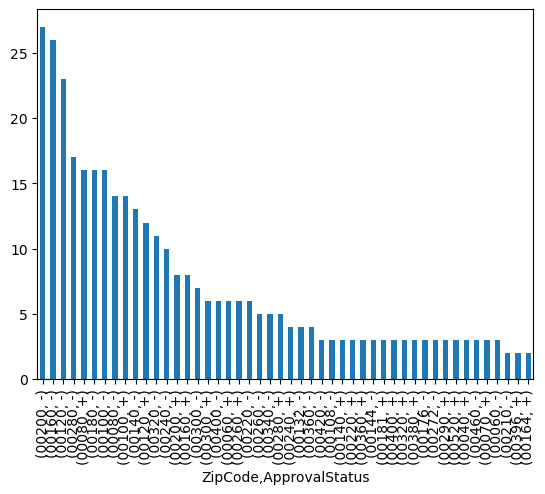

In [46]:
zip = apps.groupby(['ZipCode', 'ApprovalStatus'])
zip.size().sort_values(axis = 0, ascending = False)[2:50].plot(kind = 'bar')

The above chart shows the frequency of `Approval` and `Non Approval` across the dataset excluding the top `"00000"` zip code. 
We can see that there are many zip codes with varying distributions of approval and non approval. 
Seemingly compounding this is the fact that `"00000"` is more than 20% of our data. So simply ignoring them is not in our best interest. The solution, I think, is to redistribute the missing values in a way that will maintain the same proportion that already exists in the dataset with existing zipcode representation. That way we avoid giving undue bias to an otherwise unknown zipcode. 

##### Interpolation by proportion. 
The goal of this procedure is so that the dataset maintains the same proportion of zipcodes when we remove the `NaN` values. <br><br>
The steps to accomplish this are:
1. Change all `"00000"` back to `NaN` values.
1. Bisect the data set by _ApprovalStatus_, `'+'` and `'-'`
1. Measure the proportion of existing ZipCodes in each new data frame. 
1. Redistribute the observations by using the `df.fillna()` & `np.random.choice()` methods. 
1. Confirm new dataframes have maintained their proportions with the added data.
1. Concatenate dataframes with `pd.concat()` method and continue analysis. 

In [47]:
#change all '0000' back to np.nan
apps['ZipCode'] = apps['ZipCode'].replace('00000', np.nan)
print("Total null values = ", apps['ZipCode'].isnull().sum())

Total null values =  145


In [48]:
#now look at the split of approved to non approved in the existing dataset
apps.value_counts(subset = ['ZipCode','ApprovalStatus' ], dropna=False, normalize = True)

ZipCode  ApprovalStatus
NaN      +                 0.126087
         -                 0.084058
00200    -                 0.039130
00160    -                 0.037681
00120    -                 0.033333
                             ...   
00188    -                 0.001449
00195    +                 0.001449
00202    +                 0.001449
00204    +                 0.001449
00231    -                 0.001449
Length: 216, dtype: float64

In [49]:
apps.value_counts(subset = ['ZipCode','ApprovalStatus' ], dropna=True, normalize = True)

ZipCode  ApprovalStatus
00200    -                 0.049541
00160    -                 0.047706
00120    -                 0.042202
00280    -                 0.031193
00100    -                 0.029358
                             ...   
00188    -                 0.001835
00195    +                 0.001835
00202    +                 0.001835
00204    +                 0.001835
02000    -                 0.001835
Length: 214, dtype: float64

In [50]:
#bisect into + and - approval frames. 
approved = apps[apps['ApprovalStatus']=='+'].copy()
declined = apps[apps['ApprovalStatus'] == '-'].copy()

In [51]:
print(approved.value_counts(subset = ['ZipCode', 'ApprovalStatus'], dropna=True, normalize = True))
print(approved.isna().sum())

ZipCode  ApprovalStatus
00080    +                 0.072727
00100    +                 0.063636
00120    +                 0.054545
00160    +                 0.036364
00200    +                 0.036364
                             ...   
00168    +                 0.004545
00156    +                 0.004545
00154    +                 0.004545
00145    +                 0.004545
00840    +                 0.004545
Length: 108, dtype: float64
Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           87
Income             0
ApprovalStatus     0
dtype: int64


In [52]:
app_labels = approved['ZipCode'].value_counts(normalize= True, dropna=True).index.tolist()
app_vals = approved['ZipCode'].value_counts(normalize= True, dropna=True).tolist()
approved['ZipCode'] = approved['ZipCode'].fillna(pd.Series(np.random.choice(app_labels,p=app_vals, size = len(approved)), index = approved.index))
print(approved.value_counts(subset = ['ZipCode', 'ApprovalStatus'], dropna=False, normalize = True))
print(approved.isna().sum())                                            

ZipCode  ApprovalStatus
00080    +                 0.081433
00100    +                 0.061889
00120    +                 0.048860
00160    +                 0.039088
00200    +                 0.039088
                             ...   
00108    +                 0.003257
00102    +                 0.003257
00216    +                 0.003257
00383    +                 0.003257
00840    +                 0.003257
Length: 108, dtype: float64
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


In [53]:
print(declined.value_counts(subset = ['ZipCode', 'ApprovalStatus'], dropna=False, normalize = True))
print(declined.isna().sum()) 

ZipCode  ApprovalStatus
NaN      -                 0.151436
00200    -                 0.070496
00160    -                 0.067885
00120    -                 0.060052
00280    -                 0.044386
                             ...   
00171    -                 0.002611
00170    -                 0.002611
00168    -                 0.002611
00167    -                 0.002611
00225    -                 0.002611
Length: 107, dtype: float64
Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           58
Income             0
ApprovalStatus     0
dtype: int64


In [54]:
dec_labels = declined['ZipCode'].value_counts(normalize= True, dropna=True).index.tolist()
decl_vals = declined['ZipCode'].value_counts(normalize= True, dropna=True).tolist()
#decl_vals
declined['ZipCode'] = declined['ZipCode'].fillna(pd.Series(np.random.choice(dec_labels,p=decl_vals, size = len(declined)), index = declined.index))
print(declined.value_counts(subset = ['ZipCode', 'ApprovalStatus'], dropna=False, normalize = True))
print(declined.isna().sum())   

ZipCode  ApprovalStatus
00160    -                 0.086162
00200    -                 0.080940
00120    -                 0.060052
00100    -                 0.052219
00180    -                 0.049608
                             ...   
00254    -                 0.002611
00263    -                 0.002611
00268    -                 0.002611
00288    -                 0.002611
00225    -                 0.002611
Length: 106, dtype: float64
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


In [55]:
#now join the two dataframes back to apps. 
apps2 = pd.concat([approved, declined])
apps2.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [56]:
apps2.tail()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00360,0,-


#### Column: _Income_
This is another seemingly relevent column that could influence an algorithm's performance. However, there is no way to form an intuition about this data since we do not know for sure where it comes from. All we are guessing is the label and looking for anything that might pop out to us.  

In [57]:
apps2['Income'].describe()

count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: Income, dtype: float64

Already we can see that without knowing units we might have to deal with outliers. A max value of `100,000` doesn't really tell us much other than it is very far from the 75th percentile. 

In [58]:
apps2[apps2['Income']==100000].describe()
#thisss

,Age,Debt,YearsEmployed,CreditScore,Income
count,1.0,1.0,1.0,1.0,1.0
mean,17.5,22.0,0.0,0.0,100000.0
std,NaN,NaN,NaN,NaN,NaN
min,17.5,22.0,0.0,0.0,100000.0
25%,17.5,22.0,0.0,0.0,100000.0
50%,17.5,22.0,0.0,0.0,100000.0
75%,17.5,22.0,0.0,0.0,100000.0
max,17.5,22.0,0.0,0.0,100000.0


We only have one value at the maximum level of `100,000`. This will be addressed in a later section handling outliers in EDA.

#### Column: _Approval Status_
Our final column is our most important. This column is, for sure, our `class attribute` label. This is the value that our machine learning algorithm will want to predict with a high degree of accuracy and recall. <br><br>
I will apply a function to this column to _binarize_ it since we know we will need to keep it. That is, I am going to take the string values and convert them to numeric into a single column. 

In [59]:
apps2['ApprovalStatus'].value_counts()

-    383
+    307
Name: ApprovalStatus, dtype: int64

<a id= 'eda'></a>

---
## Exploratory Data Analysis
[[Back to contents]](#top) *-* [[Next Section: Data Preprocessing]](#preprocess)<br> <br>
This section will look at different kinds of analysis on our data set in an effort to detect meaningful groups:
1. Descriptive statistics and variability
3. Data distributions and boxplot
    * Outlier management
4. Correlation matrix

Click the variable name below to jump to the relevant subsection. 
<br><br>
EDA: [_Age_](#eda_age), [_Debt_](#eda_debt), [_Years Employed_](#eda_yearsemployed)


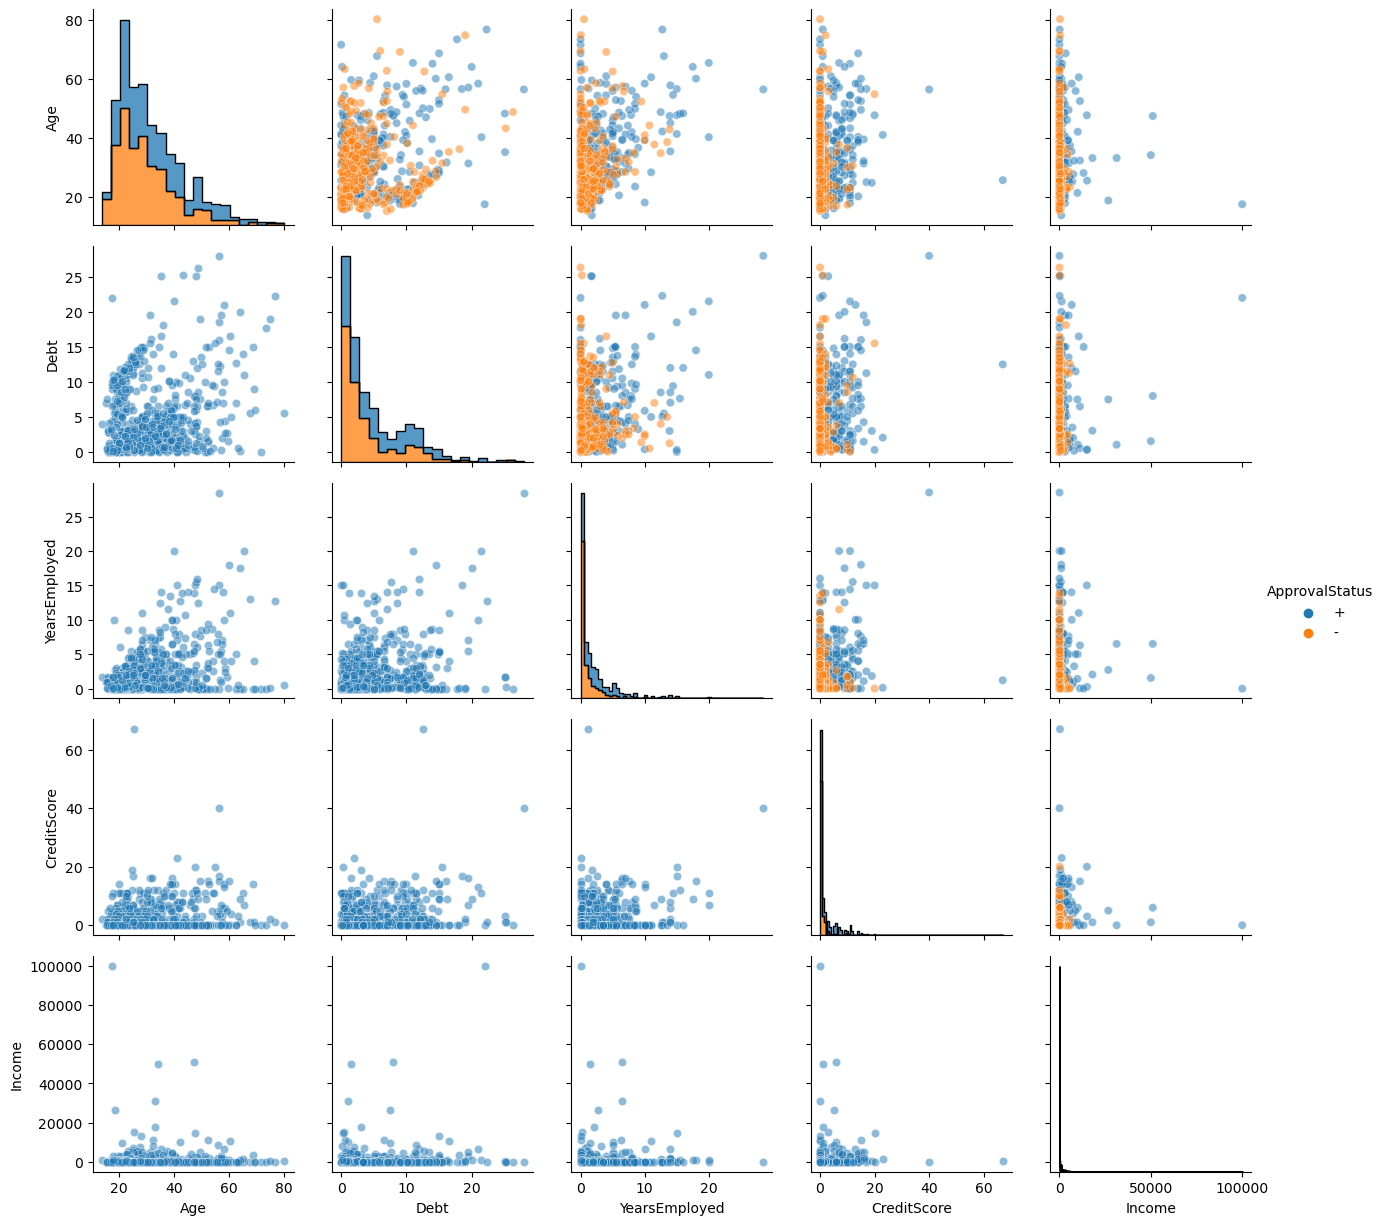

In [236]:
eda = sns.PairGrid(data = apps2, diag_sharey = False, hue = 'ApprovalStatus')
eda.map_diag(sns.histplot, multiple = 'stack', element='step')#, hue = None)
eda.map_lower(sns.scatterplot, hue = None, alpha = 0.5)
eda.map_upper(sns.scatterplot, alpha = 0.5)
eda.add_legend()

<a id="eda_age"></a>


### EDA: _Age_
If we examine the distribution of Age, we can clearly see that we have a number of outliers. "

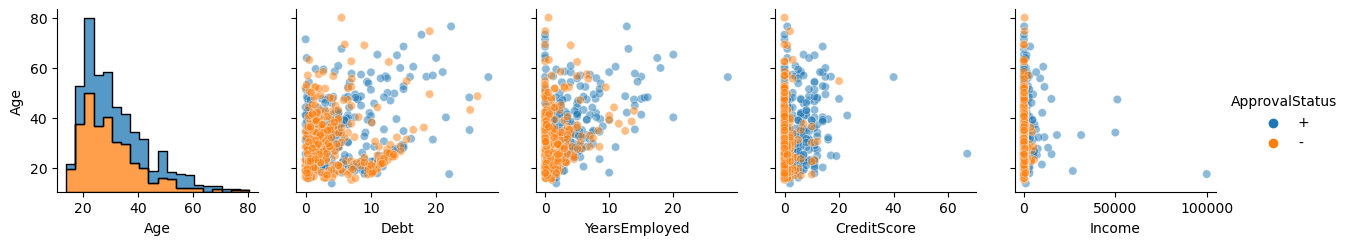

In [163]:
eda = sns.PairGrid(data = apps2, diag_sharey = False, hue = 'ApprovalStatus',  y_vars= 'Age')
eda.map_diag(sns.histplot, multiple = 'stack', element='step')#, hue = None)
eda.map_lower(sns.scatterplot, hue = None, alpha = 0.5)
eda.map_upper(sns.scatterplot, alpha = 0.5)
eda.add_legend()

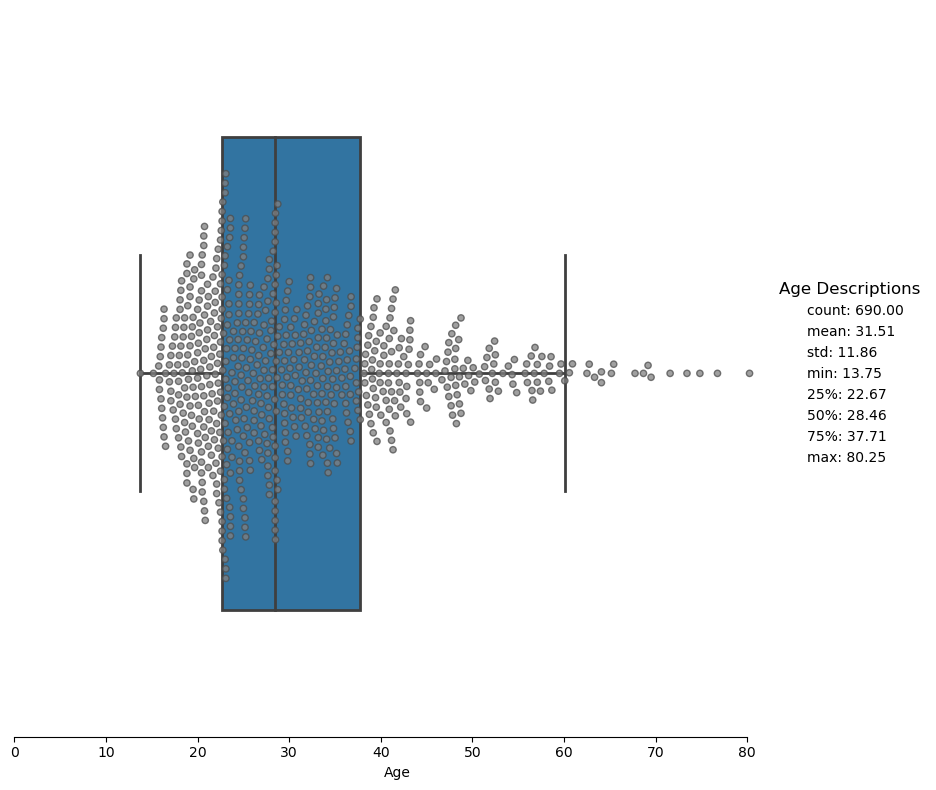

In [533]:
plt.figure(figsize = (8,8))
ax = sns.boxplot(x= 'Age', data=apps2, showfliers = False, showcaps = True, width = .65, linewidth= 2)
ax = sns.swarmplot(x = 'Age', data = apps2, color = 'grey', alpha = 0.75, size = 4.55, linewidth=1)
plt.yticks([0],[])
ax.set_xlim(0)
ax.tick_params(left=False, bottom=True)
plt.tight_layout()
sns.despine(left = True, trim = True)

#Adds stats descriptions as a legend on plot. 
'''
Code credit: https://stackoverflow.com/questions/68439996/summary-statistics-on-seaborn-plot-in-dynamic-location-or-just-out-of-the-way
'''
labels = [f"{stat}: {val:.2f}" for stat, val in apps2['Age'].describe().items()]
handles = [plt.Line2D([], [], visible=False) for _ in labels]

ax.legend( 
    handles,
    labels,
    loc="right",
    handlelength=0,
    bbox_to_anchor=(1.20,0.5),
    title = "Age Descriptions",
    title_fontsize= 12, frameon=False
);

Overall, there are a fair number of data that exist outside of the upper cap of the boxplot. Of course, if we start filtering by `ApprovalStatus` the number and density of the data will change too. 

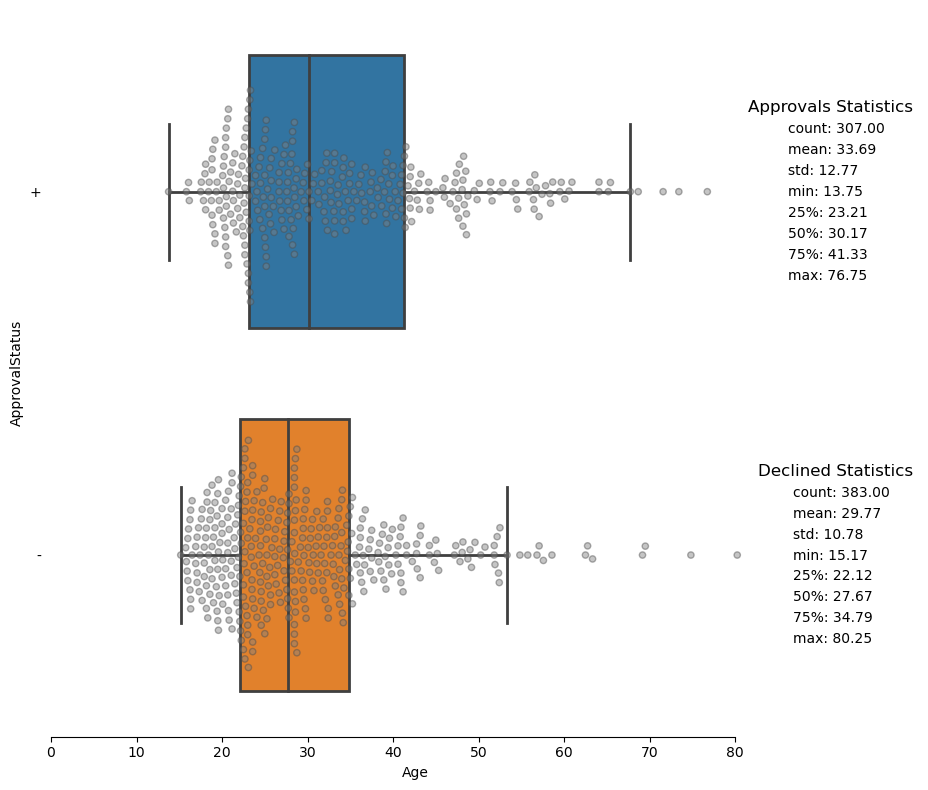

In [527]:
approvals = apps2[apps2['ApprovalStatus'] == '+']['Age'] 
declines = apps2[apps2['ApprovalStatus'] == '-']['Age'] 

plt.figure(figsize=(8,8))
ax = sns.boxplot(y= 'ApprovalStatus', x= 'Age', data=apps2, showfliers = False, showcaps = True, width = 0.75, linewidth=2)
ax = sns.swarmplot(y= 'ApprovalStatus', x = 'Age', data = apps2, color = 'grey', alpha = 0.45, linewidth=1, size= 4.55)


ax.set_xlim(0,(apps2['Age'].max()+5))
ax.tick_params(left=False, bottom=True)
sns.despine(left = True, trim = True)
plt.tight_layout()

#Adds stats descriptions as a legend on plot. 
'''
Code credit: https://stackoverflow.com/questions/68439996/summary-statistics-on-seaborn-plot-in-dynamic-location-or-just-out-of-the-way
'''
labels1 = [f"{stat}: {val:.2f}" for stat, val in approvals.describe().items()]
handles1 = [plt.Line2D([], [], visible=False) for _ in labels]
labels2 = [f"{stat}: {val:.2f}" for stat, val in declines.describe().items()]
handles2 = [plt.Line2D([], [], visible=False) for _ in labels]

approved_legend = ax.legend( 
    handles1,
    labels1,
    loc="right",
    handlelength=0,
    bbox_to_anchor=(1.20,0.75),
    title = "Approvals Statistics",
    title_fontsize= 12, frameon=False
);
#saves first legend to variable and then added to plot
plt.gca().add_artist(approved_legend)
#declines_legend =
#creates another legend
ax.legend( 
    handles2,
    labels2,
    loc="right",
    handlelength=0,
    bbox_to_anchor=(1.20,0.25),
    title = "Declined Statistics",
    title_fontsize= 12, frameon=False
);


<a id = "eda_debt"></a>
### EDA: _Debt_

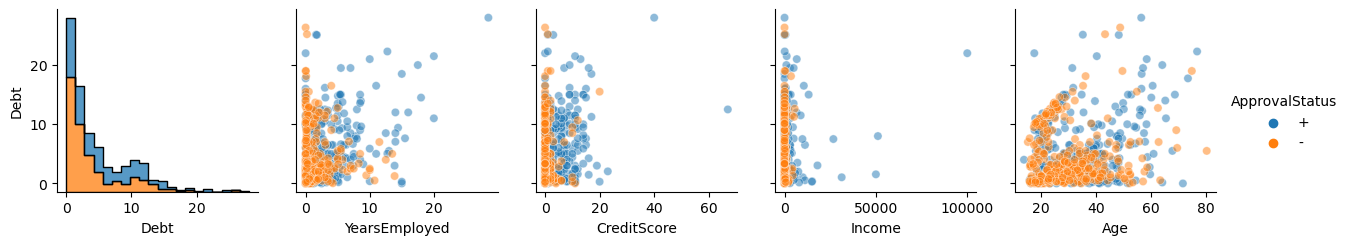

In [211]:
x_vars = ['Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Age']
y_vars = ['Debt']
eda = sns.PairGrid(apps2, diag_sharey = False, hue = 'ApprovalStatus', y_vars = y_vars, x_vars= x_vars)
eda.map_diag(sns.histplot, multiple = 'stack', element='step')#, hue = None)
eda.map_lower(sns.scatterplot, hue = None, alpha = 0.5)
eda.map_upper(sns.scatterplot, alpha = 0.5)
eda.add_legend()

In [281]:
apps2['Debt'].describe()

count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: Debt, dtype: float64

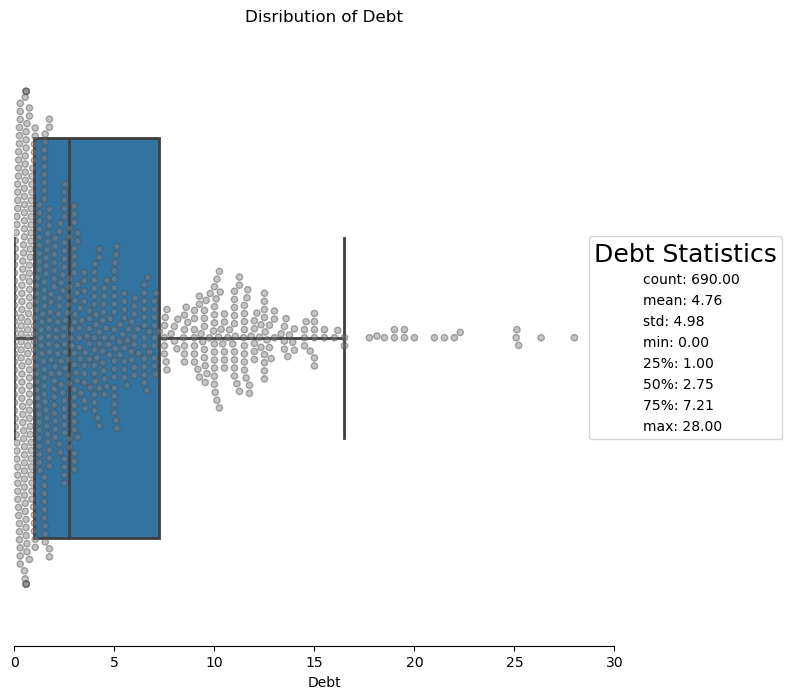

In [478]:
#make plot objects
plt.figure(figsize = (8,8))
ax = sns.boxplot(x= 'Debt', data=apps2, showfliers = False, showcaps = True, width = 0.65, linewidth= 2 )
ax = sns.swarmplot(x = 'Debt', data = apps2, color = 'grey', alpha = 0.45, size = 4.55, linewidth=1)

#modify params of plot
ax.set_title('Disribution of Debt')
ax.set_xlim(0,(apps2['Debt'].max()+3))
ax.tick_params(left=False, bottom=True)
sns.despine(left = True, trim = True)



#Adds stats descriptions as a legend on plot. 
'''
Code credit: https://stackoverflow.com/questions/68439996/summary-statistics-on-seaborn-plot-in-dynamic-location-or-just-out-of-the-way
'''
labels = [f"{stat}: {val:.2f}" for stat, val in apps2['Debt'].describe().items()]
handles = [plt.Line2D([], [], visible=False) for _ in labels]

ax.legend( 
    handles,
    labels,
    loc="right",
    handlelength=0,
    bbox_to_anchor=(1.25,0.5),
    title = "Debt Statistics",
    title_fontsize= 18,
);



In [301]:
print("*****Approvals*****\n",apps2[apps2['ApprovalStatus']=='+']['Debt'].describe())
print("*****Declines*****\n",apps2[apps2['ApprovalStatus']=='-']['Debt'].describe())

*****Approvals*****
 count    307.000000
mean       5.904951
std        5.471485
min        0.000000
25%        1.500000
50%        4.460000
75%        9.520000
max       28.000000
Name: Debt, dtype: float64
*****Declines*****
 count    383.000000
mean       3.839948
std        4.337662
min        0.000000
25%        0.835000
50%        2.210000
75%        5.000000
max       26.335000
Name: Debt, dtype: float64


/Users/nickvanbergen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


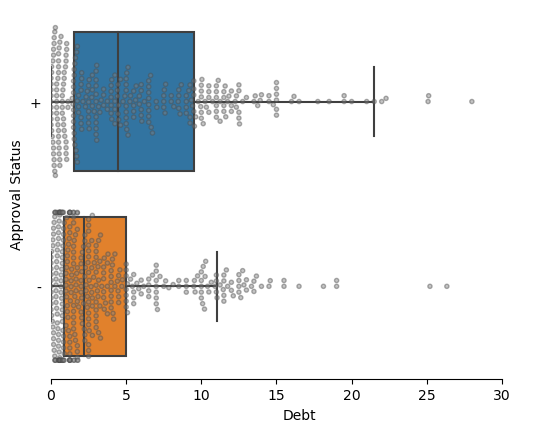

In [458]:
ax = sns.boxplot(y= 'ApprovalStatus', x= 'Debt', data=apps2, showfliers = False, showcaps = True, width = .75)
ax = sns.swarmplot(y = 'ApprovalStatus', x = 'Debt', data = apps2, color = 'grey', alpha = 0.45, size = 3, linewidth=1)
ax.set(ylabel="Approval Status")

ax.set_xlim(0,(apps2['Debt'].max()+5))
ax.tick_params(left=False, bottom=True)
sns.despine(left = True, trim = True)

<a id="eda_yearsemployed"></a>


### EDA: _Years Employed_

In [ ]:
#pairgrid

In [ ]:
#Describe Years Emp

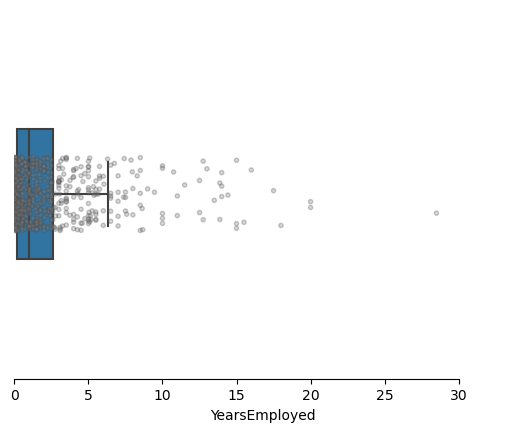

In [298]:
ax = sns.boxplot(x= 'YearsEmployed', data=apps2, showfliers = False, showcaps = True, width = .35)
ax = sns.stripplot(x = 'YearsEmployed', data = apps2, color = 'grey', alpha = 0.3, size = 3, linewidth=1)


ax.set_xlim(0,(apps2['YearsEmployed'].max()+5))
ax.tick_params(left=False, bottom=True)
sns.despine(left = True, trim = True)

In [ ]:
#Describe Years Emp Filtered

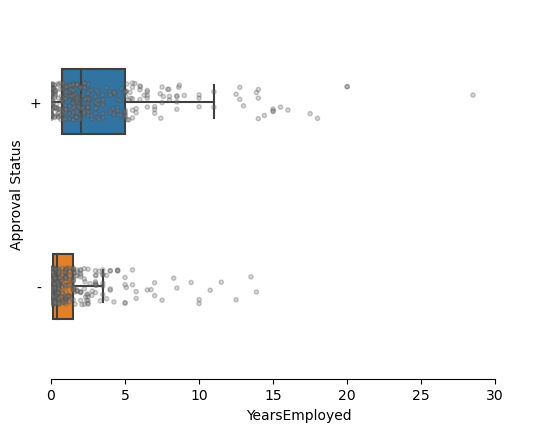

In [315]:
ax = sns.boxplot(y= 'ApprovalStatus', x= 'YearsEmployed', data=apps2, showfliers = False, showcaps = True, width = .35)
ax = sns.stripplot(y = 'ApprovalStatus', x = 'YearsEmployed', data = apps2, color = 'grey', alpha = 0.3, size = 3, linewidth=1)
ax.set(ylabel="Approval Status")

ax.set_xlim(0,(apps2['YearsEmployed'].max()+5))
ax.tick_params(left=False, bottom=True)
sns.despine(left = True, trim = True)

<a id="eda_creditscore"></a>

### EDA: _Credit Score_

In [ ]:
#PairGrid

In [ ]:
#Describe CRED SCORE

In [ ]:
#cred Scorbox

In [ ]:
#Describe Credit Score filtered

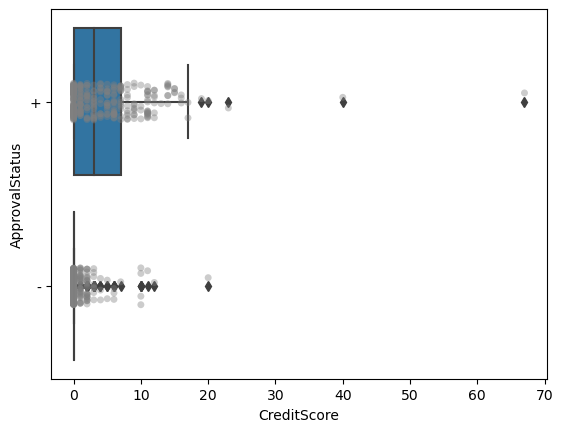

In [303]:
ax = sns.boxplot(y= 'ApprovalStatus', x= 'CreditScore', data=apps2, showfliers = True, showcaps = True)
ax = sns.stripplot(y = 'ApprovalStatus', x = 'CreditScore', data = apps2, color = 'grey', alpha = 0.4)

<a id="eda_income"></a>

### EDA: _Income_

In [ ]:
#PairGrid Income

In [ ]:
#Descripion and Box of Income

In [ ]:
#Description and Box of Filtered Income

## Data Preprocessing

In [124]:
#binarize Target variable
apps['ApprovalStatus'] = apps['ApprovalStatus'].apply(lambda x: 1 if x == '+' else 0)

## Machine Learning Model

### Fit Model
Off the shelf version of LOGREG

### Score Evaluate Model 

### Grid Search
Find a better LOGREG model with tuning

<a id="conclusions"></a>
## Conclusions and Recommendations
---
[[Back to contents]](#top)

Here we discuss the general conclusions made. 

Conclusions!
</a>